In [1]:
from textblob import TextBlob

text = "This whisky is absolutely wonderful!"
blob = TextBlob(text)
polarity = blob.sentiment.polarity
subjectivity = blob.sentiment.subjectivity

print(f"Polarity: {polarity}, Subjectivity: {subjectivity}")

Polarity: 1.0, Subjectivity: 1.0


In [2]:
from scipy.stats import norm
import pandas as pd
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
from PIL import Image
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [3]:
file_path = r'C:\Users\KDP15\Desktop\KDT6\numpy통계\미니프로젝트\japanese_whisky_review.csv'

In [4]:
jp_whiskey_DF = pd.read_csv(file_path, index_col=0)

In [5]:
jp_whiskey_DF.isnull().sum()

Bottle_name       0
Brand             0
Title             0
Review_Content    0
dtype: int64

In [6]:
jp_whiskey_DF.head()

,Bottle_name,Brand,Title,Review_Content
1,The Yamazaki Single Malt Whisky - Distiller’s ...,Yamazaki,Overpriced dissapointment,Dull taste. High price. No finish. Over-hyped ...
2,The Yamazaki Single Malt Whisky - Distiller’s ...,Yamazaki,Delicious,Delicious! sugared red fruits and sweet with a...
3,The Yamazaki Single Malt Whisky - Distiller’s ...,Yamazaki,Good for beginners. i know cos i am a beginner,I am not a whisky expert but i really love the...
4,The Yamazaki Single Malt Whisky - Distiller’s ...,Yamazaki,Yamazaki Tutorial,"This is a terrible Yamazaki. Very young, unsh..."
5,The Yamazaki Single Malt Whisky - Distiller’s ...,Yamazaki,Very Nice,First time and I like it - fresh but not thin ...


In [7]:
def calculate_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

In [8]:
jp_whiskey_DF['Title_score']=jp_whiskey_DF['Title'].apply(calculate_sentiment)

In [9]:
jp_whiskey_DF['Review_score']=jp_whiskey_DF['Review_Content'].apply(calculate_sentiment)

In [10]:
jp_whiskey_DF.to_csv('Sentiment.csv', index=False)

In [11]:
jp_whiskey_DF.loc[415]

Bottle_name                                  Yamazaki Mizunara 2012
Brand                                                      Yamazaki
Title                                     Best whisky I ever tried!
Review_Content    I’m not an expert bit that was the best whisky...
Title_score                                                     1.0
Review_score                                               0.290741
Name: 415, dtype: object

In [12]:
# 브랜드별 평균 감정 점수 - 제목
brand_avg_title = jp_whiskey_DF.groupby('Brand')['Title_score'].mean().reset_index()

In [13]:
# 제품별 평균 감정 점수 - 제목
product_avg_title = jp_whiskey_DF.groupby('Bottle_name')['Title_score'].mean().reset_index()

In [14]:
# 브랜드별 평균 감정 점수 - 리뷰
brand_avg_review = jp_whiskey_DF.groupby('Brand')['Review_score'].mean().reset_index()

In [15]:
# 브랜드별 평균 감정 점수 - 리뷰
product_avg_review = jp_whiskey_DF.groupby('Bottle_name')['Review_score'].mean().reset_index()

In [54]:
colors = [
    "#AED6F1",  # 옅은 하늘색
    "#A9DFBF",  # 옅은 초록색
    "#F9E79F",  # 옅은 노란색
    "#F5B7B1",  # 옅은 핑크색
    "#D2B4DE",  # 옅은 보라색
    "#FAD7A0",  # 옅은 주황색
    "#D5DBDB",  # 옅은 회색
    "#A3E4D7",  # 옅은 민트색
    "#D7BDE2",  # 옅은 연보라색
    "#F5CBA7",  # 옅은 살구색
]

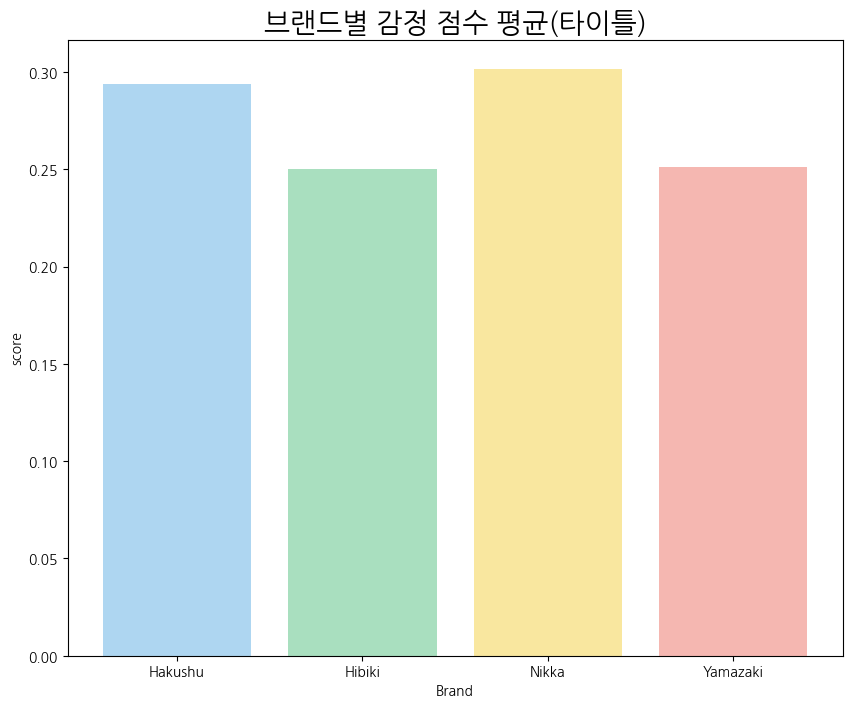

In [58]:
# 시각화
plt.figure(figsize=(10,8))
plt.bar(brand_avg_title['Brand'], brand_avg_title['Title_score'], color=colors)
plt.xlabel('Brand')
plt.ylabel('score')
plt.title('브랜드별 감정 점수 평균(타이틀)', fontsize=20)
plt.show()

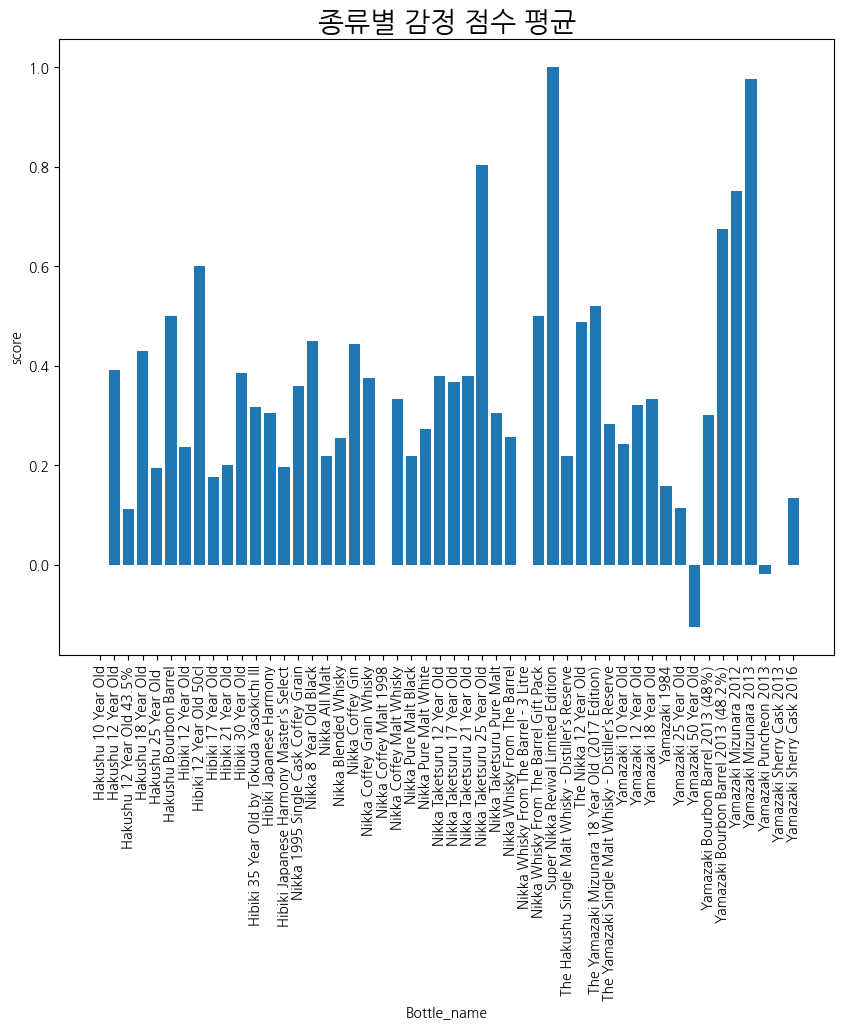

In [17]:
# 시각화
plt.figure(figsize=(10,8))
plt.bar(product_avg_title['Bottle_name'], product_avg_title['Title_score'])
plt.xlabel('Bottle_name')
plt.ylabel('score')
plt.title('종류별 감정 점수 평균', fontsize=20)
plt.xticks(rotation=90)
plt.show()

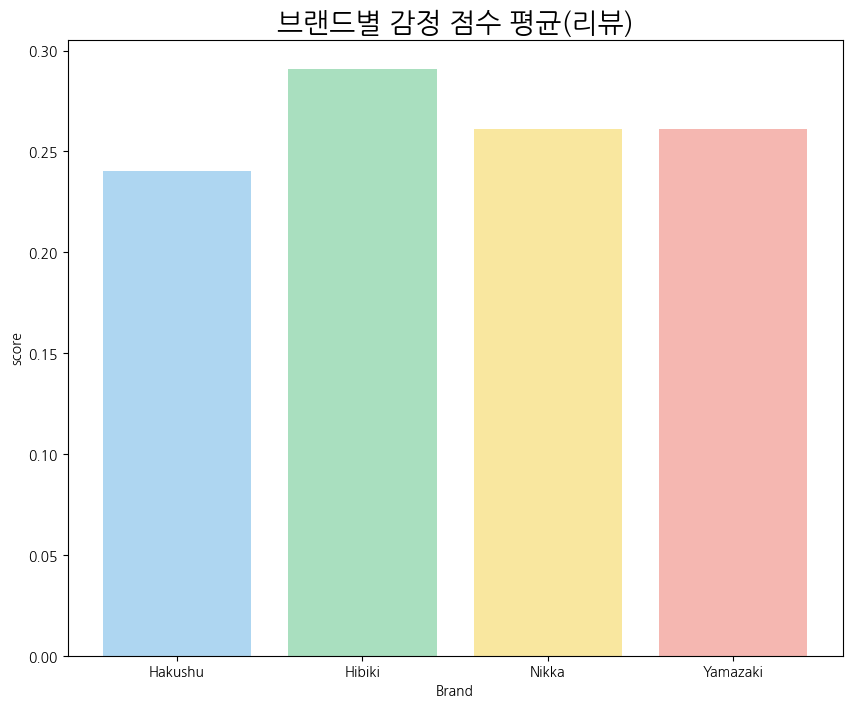

In [59]:
# 시각화
plt.figure(figsize=(10,8))
plt.bar(brand_avg_review['Brand'], brand_avg_review['Review_score'], color = colors)
plt.xlabel('Brand')
plt.ylabel('score')
plt.title('브랜드별 감정 점수 평균(리뷰)', fontsize=20)
plt.show()

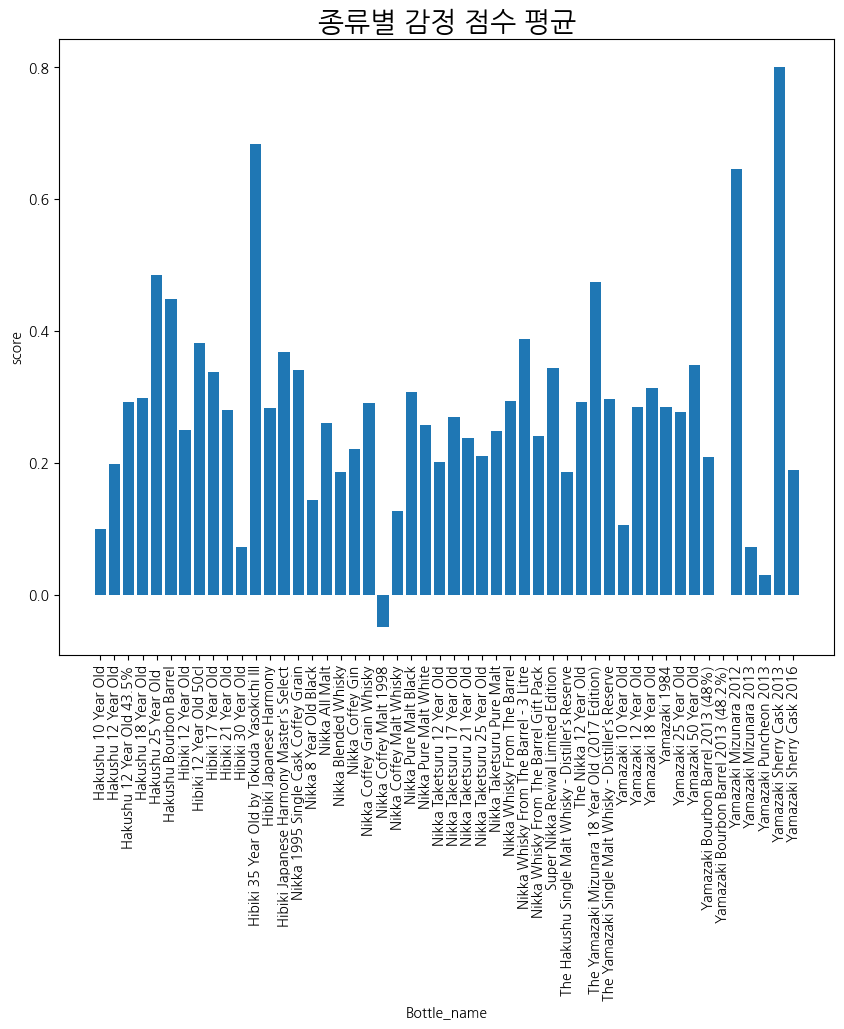

In [19]:
# 시각화
plt.figure(figsize=(10,8))
plt.bar(product_avg_review['Bottle_name'], product_avg_review['Review_score'])
plt.xlabel('Bottle_name')
plt.ylabel('score')
plt.title('종류별 감정 점수 평균', fontsize=20)
plt.xticks(rotation=90)
plt.show()

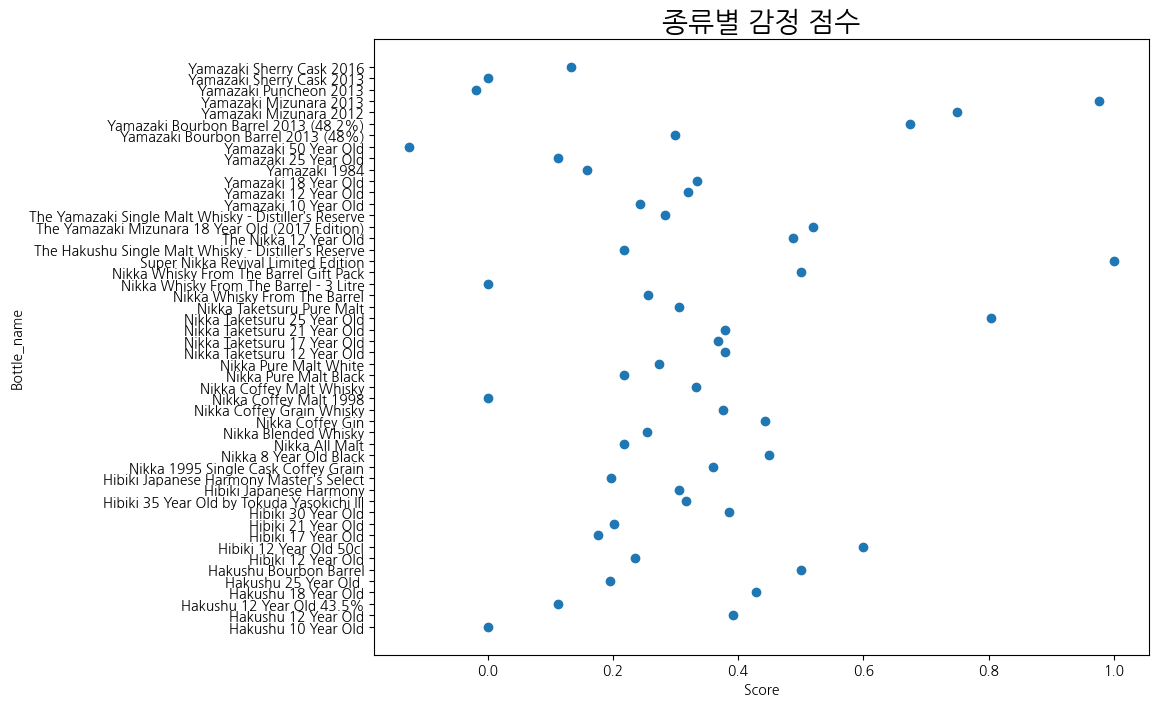

In [20]:
plt.figure(figsize=(10,8))
plt.plot(product_avg_title['Title_score'], product_avg_title['Bottle_name'], 'o')
plt.xlabel('Score')
plt.ylabel('Bottle_name')
plt.title('종류별 감정 점수', fontsize=20)
plt.show()

In [21]:
# 긍정 부정 비율
jp_whiskey_DF['postive_review'] = jp_whiskey_DF['Review_score'] > 0
jp_whiskey_DF['negative_review'] = jp_whiskey_DF['Review_score'] < 0

In [22]:
brand_positive_rate = jp_whiskey_DF.groupby('Brand')['postive_review'].mean().reset_index()
brand_negative_rate = jp_whiskey_DF.groupby('Brand')['negative_review'].mean().reset_index()

In [23]:
print(brand_positive_rate)
print(brand_negative_rate)

      Brand  postive_review
0   Hakushu        0.847059
1    Hibiki        0.882653
2     Nikka        0.859694
3  Yamazaki        0.827133
      Brand  negative_review
0   Hakushu         0.082353
1    Hibiki         0.035714
2     Nikka         0.063776
3  Yamazaki         0.102845


In [24]:
jp_whiskey_DF.corr(numeric_only=True)

,Title_score,Review_score,postive_review,negative_review
Title_score,1.000000,0.168627,0.161205,-0.130996
Review_score,0.168627,1.000000,0.560379,-0.479282
postive_review,0.161205,0.560379,1.000000,-0.682040
negative_review,-0.130996,-0.479282,-0.682040,1.000000


In [25]:
correlation = jp_whiskey_DF['Title_score'].corr(jp_whiskey_DF['Review_score'])

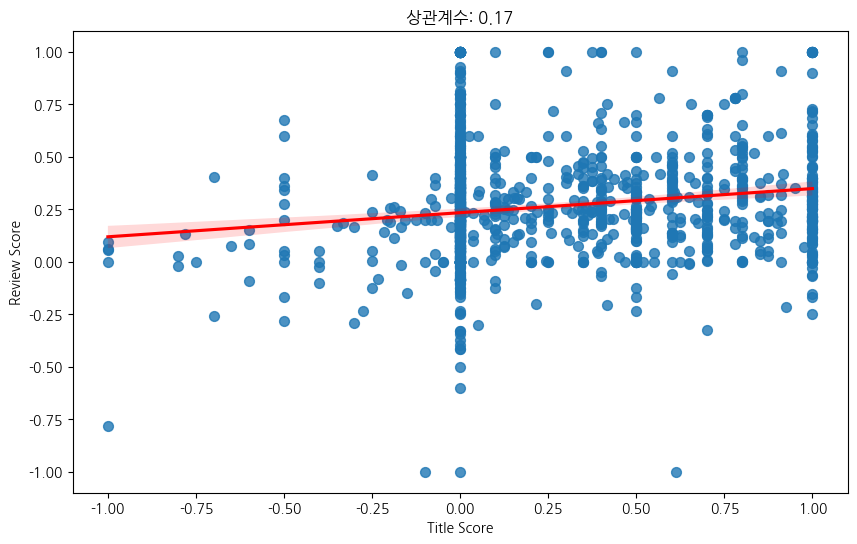

In [60]:
# 상관 계수 시각화
plt.figure(figsize=(10,6))
sns.regplot(x='Title_score', y='Review_score', data=jp_whiskey_DF, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.xlabel('Title Score')
plt.ylabel('Review Score')
plt.title(f'상관계수: {round(correlation,2)}')
plt.show()

In [27]:
correlation2 = jp_whiskey_DF['postive_review'].corr(jp_whiskey_DF['Review_score'])

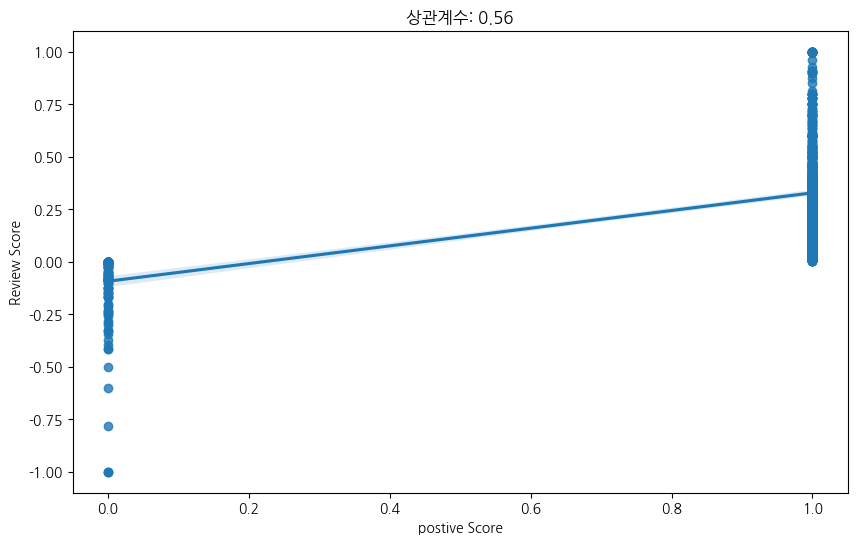

In [28]:
# 상관 계수 시각화
plt.figure(figsize=(10,6))
sns.regplot(x='postive_review', y='Review_score', data=jp_whiskey_DF)
plt.xlabel('postive Score')
plt.ylabel('Review Score')
plt.title(f'상관계수: {round(correlation2,2)}')
plt.show()

In [29]:
jp_whiskey_DF['Bottle_name'].unique().shape

(50,)

## 타이틀 워드클라우드

In [30]:
title_text = ' '.join(jp_whiskey_DF['Title'].tolist())

In [31]:
STOPWORDS.add('said')

In [32]:
img_mask = np.array(Image.open('cloud.png'))

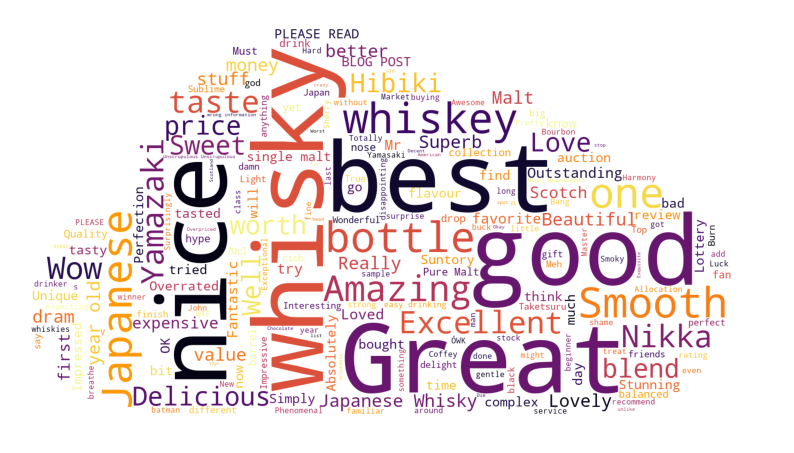

In [33]:

# Step 2: 워드클라우드 생성
wordCloud = WordCloud(
    width=400, height=400,
    background_color="white",
    max_font_size=200,
    stopwords=STOPWORDS,
    repeat=True,
    colormap='inferno', mask=img_mask).generate(title_text)


plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(wordCloud)
plt.show()



## 리뷰 워드클라우드

In [34]:
review_text = ' '.join(jp_whiskey_DF['Review_Content'].tolist())

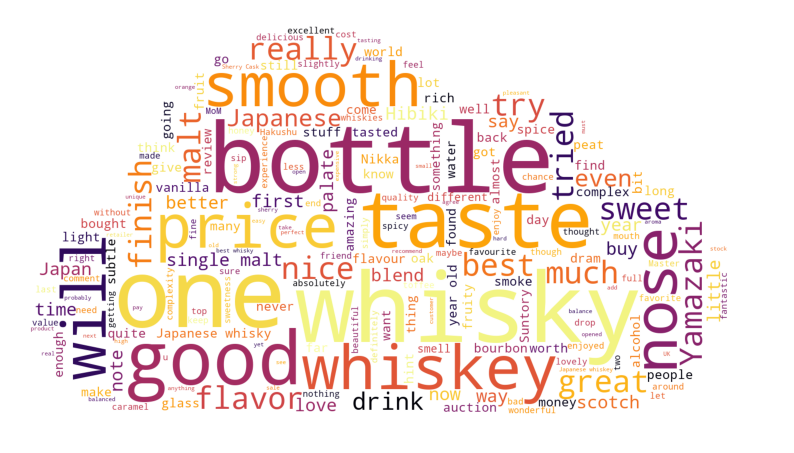

In [35]:
# Step 2: 워드클라우드 생성
wordCloud = WordCloud(
    width=400, height=400,
    background_color="white",
    max_font_size=200,
    stopwords=STOPWORDS,
    repeat=True,
    colormap='inferno', mask=img_mask).generate(review_text)


plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(wordCloud)
plt.show()


In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [37]:
x = jp_whiskey_DF['Title_score'].values.reshape(-1, 1)  # 독립변수
y = jp_whiskey_DF['Review_score'].values               #종속변수

In [38]:
# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(x, y)

LinearRegression()

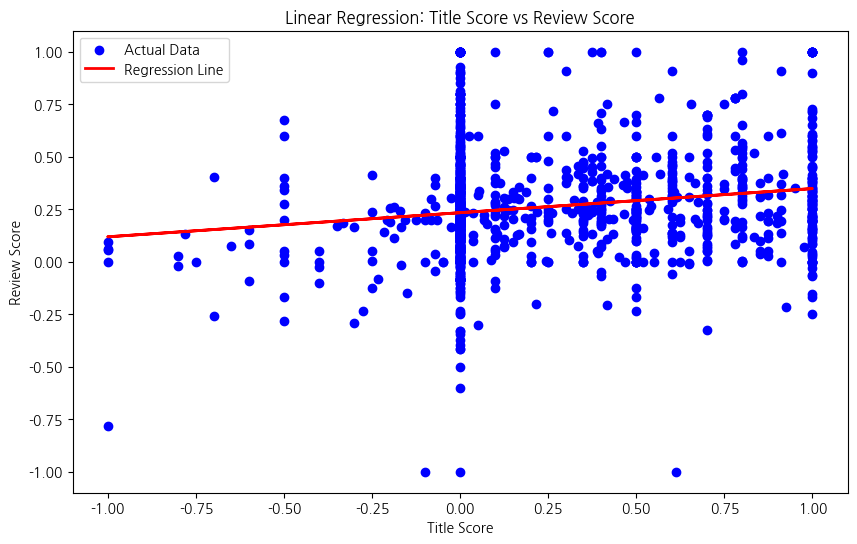

In [39]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Actual Data')
plt.plot(x, model.predict(x), color='red', linewidth=2, label='Regression Line')
plt.xlabel('Title Score')
plt.ylabel('Review Score')
plt.title('Linear Regression: Title Score vs Review Score')
plt.legend()
plt.show()

In [40]:
# 모델의 예측값
y_pred = model.predict(x)
# R^2 (결정계수) 계산
r2 = r2_score(y, y_pred)

# 평균 제곱 오차 (MSE) 계산
mse = mean_squared_error(y, y_pred)

### 변동성 2.84%만 설명가능 

In [41]:
print(f'결정계수 :{r2:.2} \n평균제곱 오차 : {mse:.2}')

결정계수 :0.028 
평균제곱 오차 : 0.07


In [42]:
# Title_score와 Review_score의 분포 분석: 평균, 중앙값, 표준편차 계산
title_mean = np.mean(jp_whiskey_DF['Title_score'])
title_median = np.median(jp_whiskey_DF['Title_score'])
title_std = np.std(jp_whiskey_DF['Title_score'])

review_mean = np.mean(jp_whiskey_DF['Review_score'])
review_median = np.median(jp_whiskey_DF['Review_score'])
review_std = np.std(jp_whiskey_DF['Review_score'])

# 결과 출력
title_stats = {
    'Mean': title_mean,
    'Median': title_median,
    'Standard Deviation': title_std
}

review_stats = {
    'Mean': review_mean,
    'Median': review_median,
    'Standard Deviation': review_std
}

title_stats, review_stats

({'Mean': 0.27164260000846013,
  'Median': 0.006249999999999992,
  'Standard Deviation': 0.39458481158468883},
 {'Mean': 0.2647060526044095,
  'Median': 0.2360966810966811,
  'Standard Deviation': 0.26863950928942315})

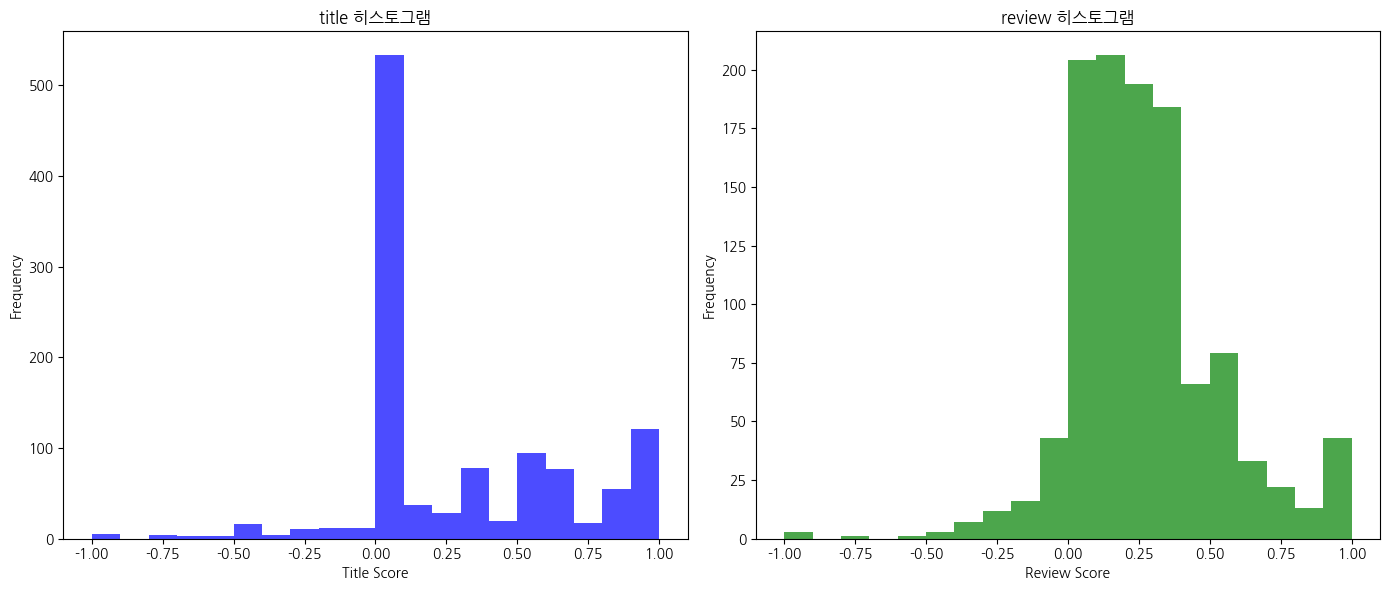

In [43]:
# 분포 그래프 그리기
plt.figure(figsize=(14, 6))

# 제목 감정 점수 분포
plt.subplot(1, 2, 1)
plt.hist(jp_whiskey_DF['Title_score'], bins=20, color='blue', alpha=0.7)
plt.title('title 히스토그램')
plt.xlabel('Title Score')
plt.ylabel('Frequency')

# 리뷰 감정 점수 분포
plt.subplot(1, 2, 2)
plt.hist(jp_whiskey_DF['Review_score'], bins=20, color='green', alpha=0.7)
plt.title('review 히스토그램')
plt.xlabel('Review Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [44]:
title_scores = jp_whiskey_DF['Title_score']
review_scores = jp_whiskey_DF['Review_score']


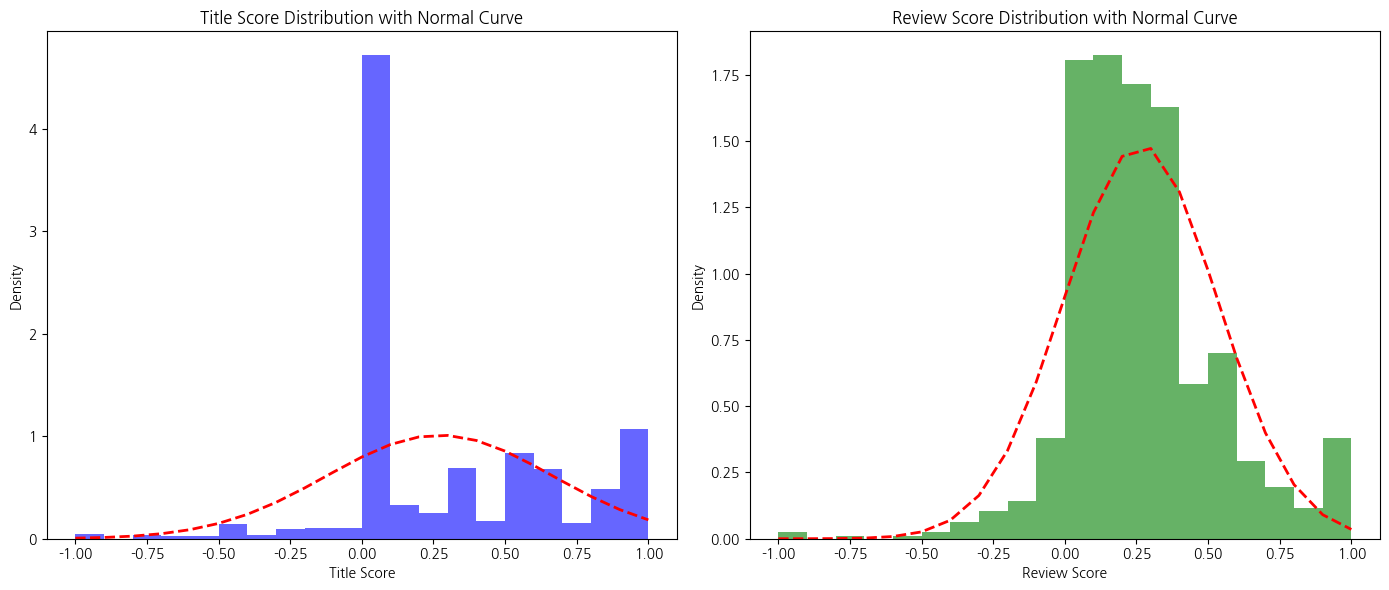

In [45]:
# Title_score의 정규분포 그리기
plt.figure(figsize=(14, 6))

# Title_score 
plt.subplot(1, 2, 1)
count, bins, ignored = plt.hist(title_scores, bins=20, density=True, alpha=0.6, color='blue')
mu, std = norm.fit(title_scores)  # 정규분포의 평균과 표준편차
plt.plot(bins, norm.pdf(bins, mu, std), 'r--', linewidth=2)
plt.title('Title Score Distribution with Normal Curve')
plt.xlabel('Title Score')
plt.ylabel('Density')

# Review_score
plt.subplot(1, 2, 2)
count, bins, ignored = plt.hist(review_scores, bins=20, density=True, alpha=0.6, color='green')
mu, std = norm.fit(review_scores)  # 정규분포의 평균과 표준편차
plt.plot(bins, norm.pdf(bins, mu, std), 'r--', linewidth=2)
plt.title('Review Score Distribution with Normal Curve')
plt.xlabel('Review Score')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

title score: 점수의 대부분이 0에 몰려있다.
 - 제목들이 중립적이거나 부정적인경향이 있다.

 review score: 0.2! 0.3 사이에 몰려있다.
 - 대체로 긍정적이다.
 

In [51]:
jp_whiskey_DF[jp_whiskey_DF['Bottle_name'].str.contains('Yamazaki Mizunara 18')]

,Bottle_name,Brand,Title,Review_Content,Title_score,Review_score,postive_review,negative_review
453,The Yamazaki Mizunara 18 Year Old (2017 Edition),Yamazaki,Excellent,I was fortunate enough to win the dram lottery...,1.000000,0.357143,True,False
454,The Yamazaki Mizunara 18 Year Old (2017 Edition),Yamazaki,The Hoff of Whisky,"This whisky is so sexy, if it were a human bei...",0.000000,0.250000,True,False
455,The Yamazaki Mizunara 18 Year Old (2017 Edition),Yamazaki,Cool!,It’s too cool. Way too cool!,0.437500,0.393750,True,False
456,The Yamazaki Mizunara 18 Year Old (2017 Edition),Yamazaki,Single Malt gods...let me win this lottery!,"Extraordinary flavor, with a scent that's spic...",0.464286,0.666667,True,False
457,The Yamazaki Mizunara 18 Year Old (2017 Edition),Yamazaki,Good for collection,Good whisky,0.700000,0.700000,True,False
